In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data.corr()

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

In [3]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.shape

(144, 2)

In [5]:
data['Month'] = pd.to_datetime(data['Month'])
# data.set_index('Month', inplace=True)

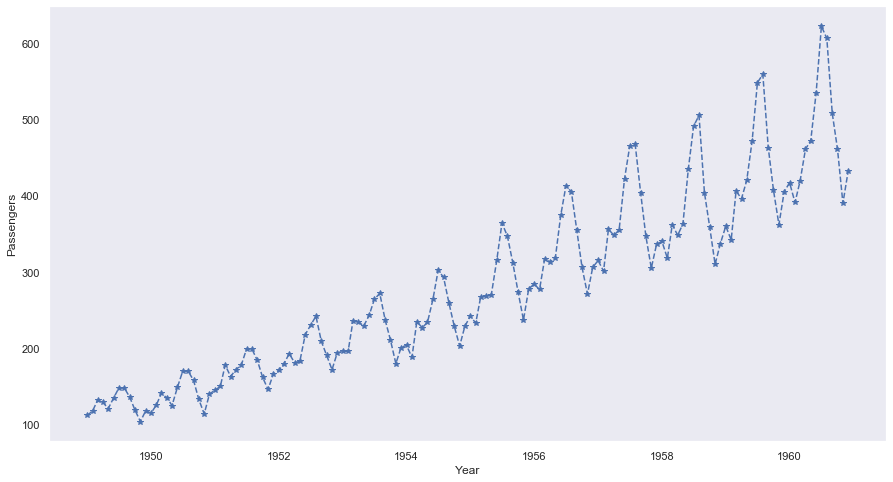

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(data.index, data['Passengers'], '--', marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

In [8]:
data.isnull().sum()

Passengers    0
dtype: int64

In [9]:
df = data.copy()
rows = df.sample(frac=0.1, random_state=0)
rows['Passengers'] = np.nan
df.loc[rows.index, 'Passengers'] = rows['Passengers']
df.isnull().sum()

Passengers    14
dtype: int64

In [10]:
df_inter_fwd = df.interpolate(method='linear', limit_direction='forward')
df_inter_bwd = df.interpolate(method='linear', limit_direction='backward')

In [11]:
print(df_inter_fwd.isnull().sum())
print(df_inter_bwd.isnull().sum())

Passengers    0
dtype: int64
Passengers    0
dtype: int64


##### Average Smoothing

In [13]:
data_MA = data.copy()
MA = data_MA['Passengers'].rolling(12).mean()
print(MA.shape)
MA

(144,)


Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: Passengers, Length: 144, dtype: float64

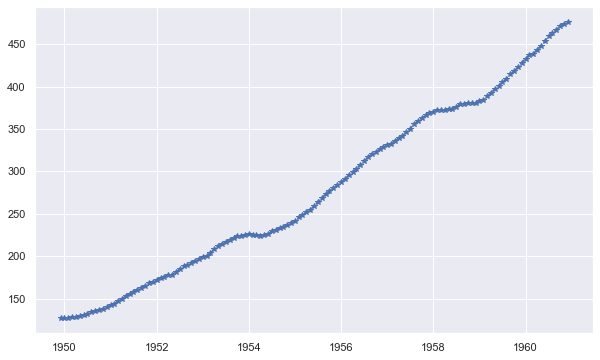

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(MA.index, MA, '--', marker='*' )
plt.show()

##### Time Series Exploratory Methods

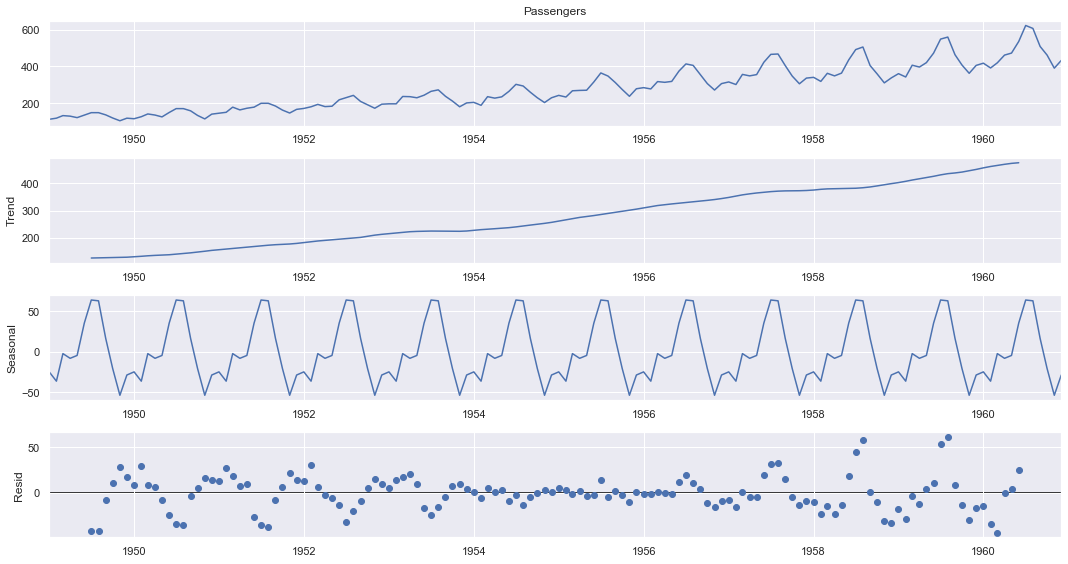

In [18]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

decompose_series = sm.tsa.seasonal_decompose(data['Passengers'], model='additive')
decompose_series.plot()
plt.show()

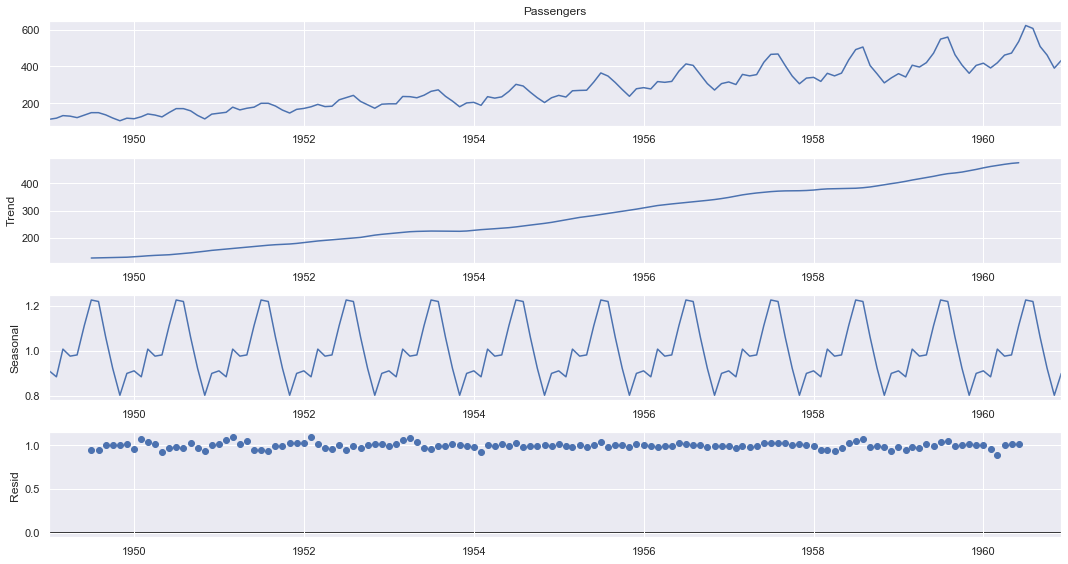

In [19]:
decompose_series2 = sm.tsa.seasonal_decompose(data['Passengers'], model='multiplicative')
decompose_series2.plot()
plt.show()

In [21]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'ADF p-value: {result[1]}')
print(f'No. of lags used: {result[2]}')
print(f'No. of observations used: {result[3]}')
print("Critical Values")
for k, v in result[4].items():
    print(f'{k} : {v}')

ADF Statistic: 0.8153688792060456
ADF p-value: 0.991880243437641
No. of lags used: 13
No. of observations used: 130
Critical Values
1% : -3.4816817173418295
5% : -2.8840418343195267
10% : -2.578770059171598


Ho = Series is stationary <br>
Ha = Series is not stationary <br>
Decision Rule: Reject ho if p-value > vritical value <br>
Conclusion: <br>
Since the p-value is greater than the critical value at 5%, we conclude that the series is not stationary ALSO since the ADF statistic is greater than the critical values at all levels, we reaffirm that the series is not stationary

In [45]:
# To remove Trend and seasonality
df_log = np.log(data)
df_diff = df_log.diff(periods=1)

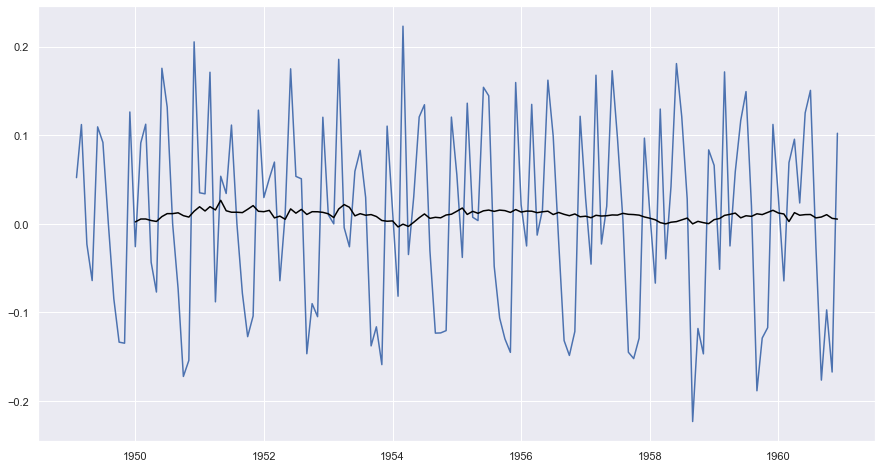

In [26]:
plt.plot(df_diff.index, df_diff['Passengers'], '-')
plt.plot(df_diff.rolling(12).mean(), color='black')
plt.show()

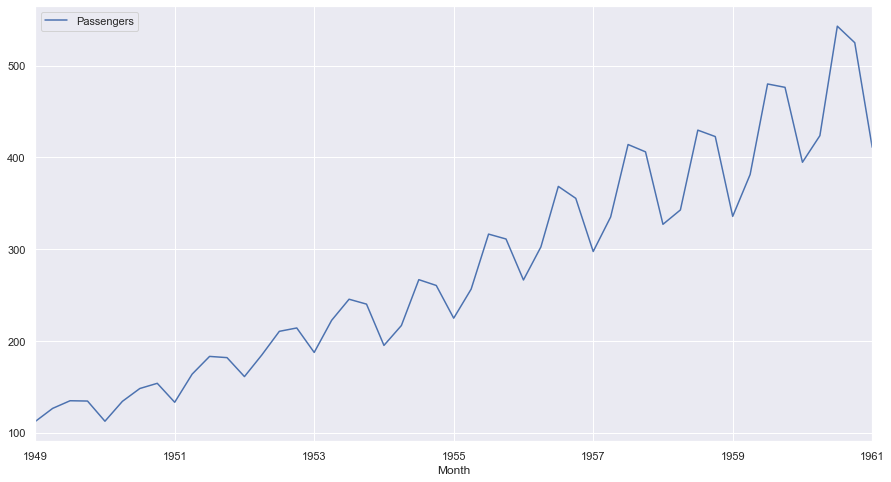

In [27]:
# Downsample
df_quarterly = data.resample('3M').mean()
df_quarterly.plot()

In [29]:
# Upsample
df_daily = data.resample('D').mean()
# df_daily.plot()

## Time Series Forecasting Using Stochastic Methods

In [30]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [48]:
diff = data.diff(periods=1)
diff = diff.fillna(value=0)

<Figure size 288x288 with 0 Axes>

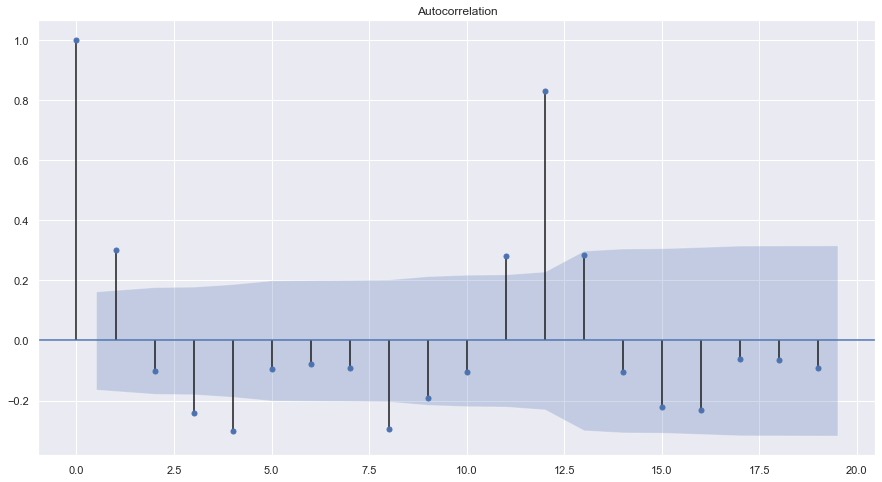

In [49]:
# ACF
plt.figure(figsize=(4,4))
plot_acf(diff.Passengers, lags = range(0, 20))
plt.show()

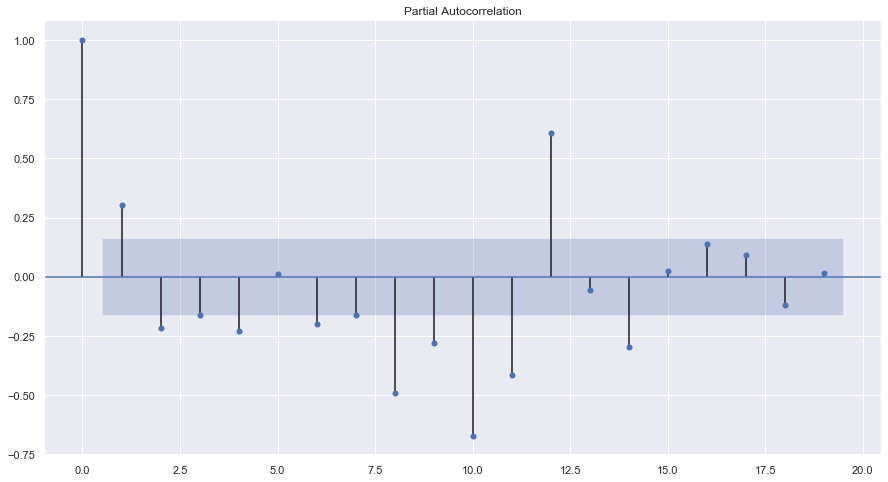

In [50]:
plot_pacf(diff, lags=range(20))
plt.show()

C:\Users\CHARLIE\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


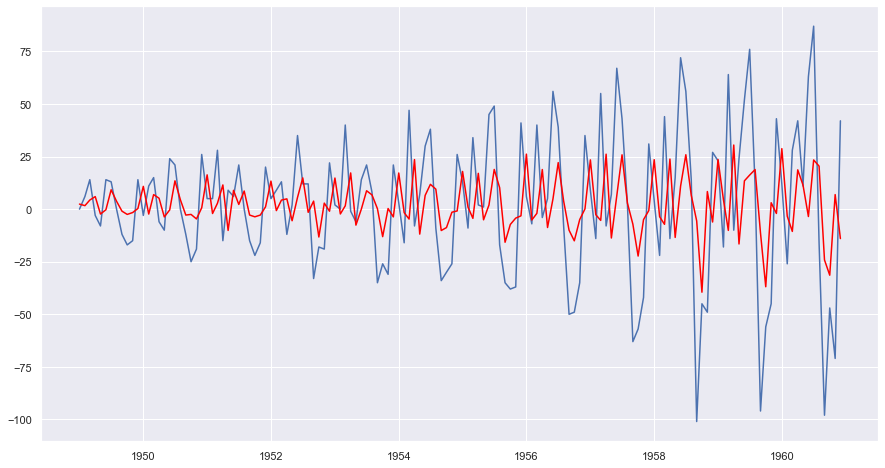

In [52]:
# AR
from statsmodels.tsa.arima_model import ARIMA
AR_model = ARIMA(diff, order=(2, 0, 0))
AR_results = AR_model.fit()
plt.plot(diff)
plt.plot(AR_results.fittedvalues, color='red')

C:\Users\CHARLIE\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


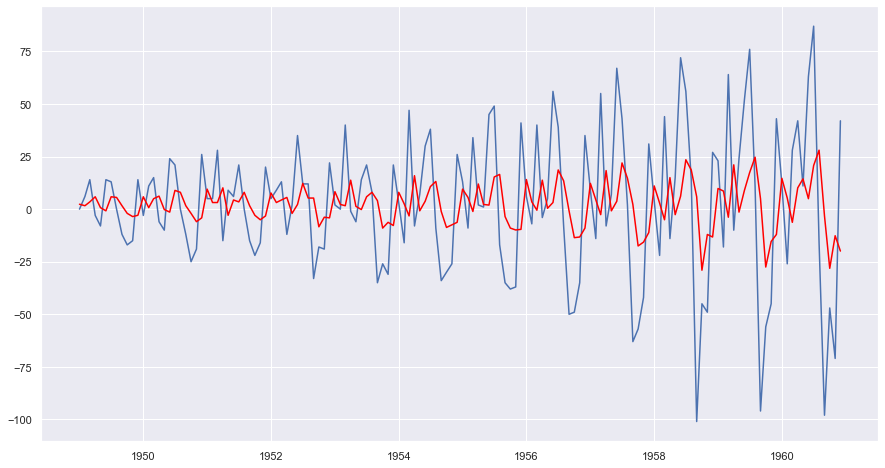

In [53]:
AR_model = ARIMA(diff, order=(1, 0, 0))
AR_results = AR_model.fit()
plt.plot(diff)
plt.plot(AR_results.fittedvalues, color='red')

C:\Users\CHARLIE\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


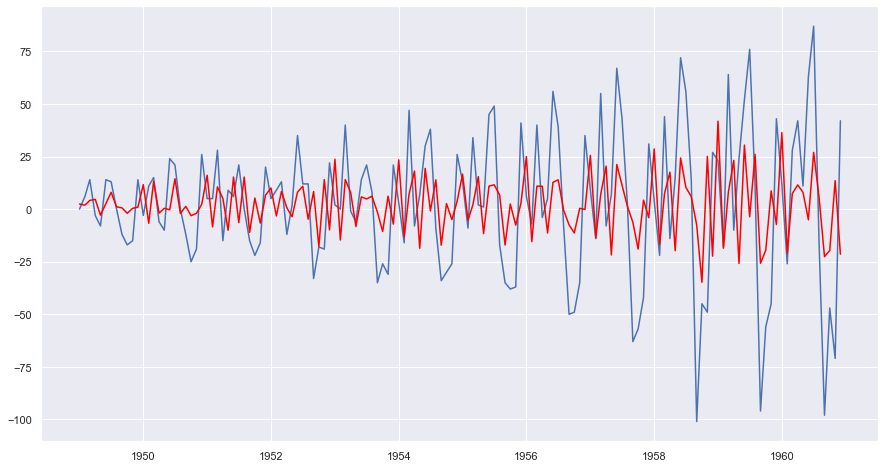

In [54]:
MA_model = ARIMA(diff, order=(0, 0, 2))
MA_results = MA_model.fit()
plt.plot(diff)
plt.plot(MA_results.fittedvalues, color='red')

C:\Users\CHARLIE\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


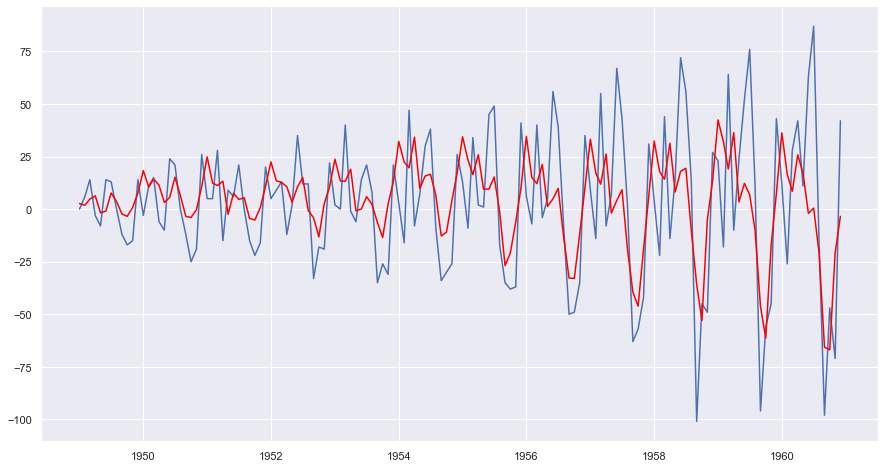

In [55]:
ARMA_model = ARIMA(diff, order=(2, 0, 1))
ARMA_results = ARMA_model.fit()
plt.plot(diff)
plt.plot(ARMA_results.fittedvalues, color='red')

### Using FBProphet

In [57]:
!conda install -c conda-forge fbprophet -y

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\CHARLIE\anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    conda-4.8.5                |   py37hf50a25e_2         3.0 MB  conda-forge
    convertdate-2.2.2          |     pyh9f0ad1d_0          33 KB  conda-forge
    ephem-3.7.7.1              |   py37hfa6e2cd_0         741 KB  conda-forge
    fbprophet-0.6              |   py37h6538335_0         521 KB  conda-forge
    holidays-0.10.3            |     pyh9f0ad1d_0          61 KB  conda-forge
    korean_



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda




In [ ]:
!conda update -n base -c defaults conda

In [6]:
train = data.copy()
train.head(3)

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132


In [7]:
from fbprophet import Prophet

In [8]:
train = train.rename(columns={'Month':'ds', 'Passengers':'y'})

In [9]:
train.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
model = Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\CHARLIE\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [11]:
#Predict for next 10 months
future = model.make_future_dataframe(periods=10, freq='M')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.305438,56.349527,116.188946,107.305438,107.305438,-21.441736,-21.441736,-21.441736,-21.441736,-21.441736,-21.441736,0.0,0.0,0.0,85.863702
1,1949-02-01,109.453605,50.164895,108.146096,109.453605,109.453605,-30.116981,-30.116981,-30.116981,-30.116981,-30.116981,-30.116981,0.0,0.0,0.0,79.336624
2,1949-03-01,111.393884,84.148206,139.684556,111.393884,111.393884,-0.479840,-0.479840,-0.479840,-0.479840,-0.479840,-0.479840,0.0,0.0,0.0,110.914044
3,1949-04-01,113.542050,82.015936,138.122551,113.542050,113.542050,-4.944334,-4.944334,-4.944334,-4.944334,-4.944334,-4.944334,0.0,0.0,0.0,108.597716
4,1949-05-01,115.620921,82.547593,141.777292,115.620921,115.620921,-3.631653,-3.631653,-3.631653,-3.631653,-3.631653,-3.631653,0.0,0.0,0.0,111.989268


In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,1949-01-01,85.863702,56.349527,116.188946,107.305438,107.305438,107.305438
1,1949-02-01,79.336624,50.164895,108.146096,109.453605,109.453605,109.453605
2,1949-03-01,110.914044,84.148206,139.684556,111.393884,111.393884,111.393884
3,1949-04-01,108.597716,82.015936,138.122551,113.542050,113.542050,113.542050
4,1949-05-01,111.989268,82.547593,141.777292,115.620921,115.620921,115.620921


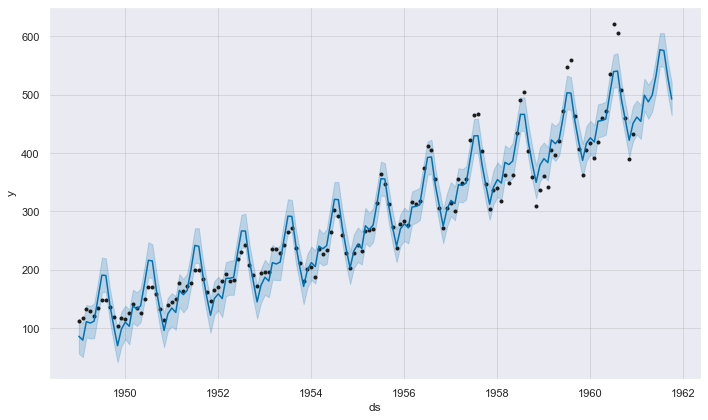

In [16]:
model.plot(forecast)
plt.show()

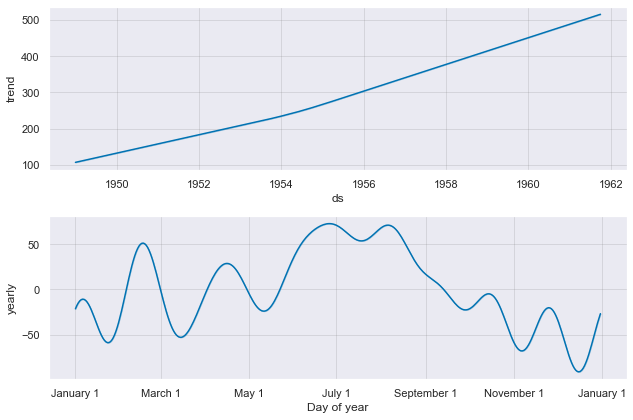

In [18]:
model.plot_components(forecast)
plt.show()

In [ ]:
def evaluate_forecast(actual, predicted):
    scores = []
    for i in range(actual.shape[1]):
        rmse = np.sqrt(mean_squared_error(actual[:, i], predicted[:, i]))
        scores.append(rmse)
    
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = np.sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

In [ ]:
def split_dataset(data):
    # split into standard weeks
    train, test = data[1:-328], data[-328:-6]
    # restructure into windows of weekly data
    train = np.array(np.split(train, len(train)/7))
    test = np.array(np.split(test, len(test)/7))
    return train, test

In [ ]:
my_df = pd.read_csv('../input/energy-consumption/household_power_consumption.txt', sep=';',na_values='?',dtype= float,
                  header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, 
                 index_col='datetime')

daily = my_df.resample('D')
new_daily = daily.sum()

In [ ]:
train, test = split_dataset(daily_data.values)

# validate train data
print(train.shape)
print(train[0, 0, 0], train[-1, -1, 0])
# validate test
print(test.shape)
print(test[0, 0, 0], test[-1, -1, 0])

In [ ]:
# evaluate a single model
def evaluate_model(train, test, n_input):
    # fit model
    model = build_model(train, n_input)
    # history is a list of weekly data
    history = [x for x in train]
    # walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
        # predict the week
        yhat_sequence = forecast(model, history, n_input)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
    # evaluate predictions days for each week
    predictions = array(predictions)
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores

In [ ]:
# summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

In [ ]:
# flatten data
data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))